In [1]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core/')
sys.path.append('/kaggle/input/my-flagellar-library/')
import flg_support as fls
import flg_runner
import importlib
import numpy as np
import matplotlib.pyplot as plt
import time
import copy
import os
import itertools
import glob
import dataclasses
import pandas as pd
import statsmodels.api as sm
import ISLP
import ISLP.models

MainProcess


In [2]:
# Prepare datasets
fls.download_kaggle_dataset('jeroencottaar/byu-many-models-abbreviated/', fls.result_dir + '/many_abbr_res/')

In [3]:
# Read results from vast.ai
files = glob.glob(fls.result_dir + '/many_abbr_res/' + '*.pickle')
dicts = []
dicts_kaggle_comp = []
for f in files:    
    print(f)
    data = fls.dill_load(f)    
    d = data.modifier_values
    d['git_commit_id'] = data.git_commit_id
    d['use_missing_value'] = data.use_missing_value
    d['cv_score'] = fls.score_competition_metric(data.inferred_test_data, data.test_data)

    d_kaggle_comp = dict()
    d_kaggle_comp['git_commit_id'] = d['git_commit_id']
    d_kaggle_comp['use_missing_value'] = d['use_missing_value']
    d_kaggle_comp['seed'] = d['seed']   
    d_kaggle_comp['cv_score'] = d['cv_score']

    dicts_kaggle_comp.append(d_kaggle_comp)

    # First set
    #if not (d['seed']<26 or d['use_missing_value']): print('skip'); continue

    # New
    if not (d['seed']>=26 or d['use_missing_value']): print('skip'); continue
    
    for partial in fls.DataSelector().datasets:
        data_selector = fls.DataSelector()
        data_selector.datasets = [partial]
        d['cv_score_' + partial] = fls.score_competition_metric(data_selector.select(data.inferred_test_data), data_selector.select(data.test_data))
    d['k_score']= np.nan

    dicts.append(d)    
p = pd.DataFrame(dicts)
p.sort_values(['seed', 'git_commit_id'], inplace=True);

p_kaggle_comp = pd.DataFrame(dicts_kaggle_comp)
p_kaggle_comp.sort_values(['seed', 'git_commit_id'], inplace=True);

# First set
# p = p[np.logical_or(p['seed']<26, p['use_missing_value'])]

# New
#p = p[np.logical_or(p['seed']>=26, p['use_missing_value'])]

p = p.reset_index()
p_kaggle_comp = p_kaggle_comp.reset_index()

d:/flagellar/results//many_abbr_res\Baseline_0M_f766ff07_547 _a.pickle
d:/flagellar/results//many_abbr_res\Baseline_0_a103863a_651 _a.pickle
skip
d:/flagellar/results//many_abbr_res\Baseline_10_a103863a_245 _a.pickle
skip
d:/flagellar/results//many_abbr_res\Baseline_11_a103863a_089 _a.pickle
skip
d:/flagellar/results//many_abbr_res\Baseline_12_ed604774_284 _a.pickle
skip
d:/flagellar/results//many_abbr_res\Baseline_13_f766ff07_795 _a.pickle
skip
d:/flagellar/results//many_abbr_res\Baseline_14_f766ff07_275 _a.pickle
skip
d:/flagellar/results//many_abbr_res\Baseline_15_f766ff07_207 _a.pickle
skip
d:/flagellar/results//many_abbr_res\Baseline_16_f766ff07_300 _a.pickle
skip
d:/flagellar/results//many_abbr_res\Baseline_17_f766ff07_057 _a.pickle
skip
d:/flagellar/results//many_abbr_res\Baseline_18_f766ff07_2 _a.pickle
skip
d:/flagellar/results//many_abbr_res\Baseline_19_f766ff07_352 _a.pickle
skip
d:/flagellar/results//many_abbr_res\Baseline_1_a103863a_357 _a.pickle
skip
d:/flagellar/results/

In [4]:
# Load Kaggle results
p_kaggle_results = pd.read_csv(fls.code_dir + '../kaggle_results.csv')
#print(p_kaggle_results)
for i_k in range(len(p_kaggle_results)):
    for i_i in range(len(p_kaggle_comp)):
        if p_kaggle_results['seed'][i_k] == p_kaggle_comp['seed'][i_i] and p_kaggle_results['git_commit_id'][i_k] == p_kaggle_comp['git_commit_id'][i_i] and  p_kaggle_results['use_missing_value'][i_k] == p_kaggle_comp['use_missing_value'][i_i]:
            p_kaggle_comp.loc[i_i,'k_score'] = p_kaggle_results['k_score'][i_k]
for i_k in range(len(p_kaggle_results)):
    for i_i in range(len(p)):
        if p_kaggle_results['seed'][i_k] == p['seed'][i_i] and p_kaggle_results['git_commit_id'][i_k] == p['git_commit_id'][i_i] and  p_kaggle_results['use_missing_value'][i_k] == p['use_missing_value'][i_i]:
            p.loc[i_i,'k_score'] = p_kaggle_results['k_score'][i_k]

In [5]:
# Write results to Kaggle results file
p_kaggle_cache = copy.deepcopy(p_kaggle_comp[['git_commit_id', 'use_missing_value', 'seed', 'cv_score', 'k_score']])
p_kaggle_cache.to_csv(fls.code_dir + '../kaggle_results.csv')

In [6]:
p.to_csv(fls.code_dir + '../results.csv')
p

,index,seed,scale_percentile_value,img_size,n_epochs,model_name,use_pretrained_weights,box_size,trust,fix_norm_bug,...,aba,ycw,git_commit_id,use_missing_value,cv_score,cv_score_tom,cv_score_ycw,cv_score_aba,cv_score_mba,k_score
0,0,0,2.000000,640,30,yolov8m,True,24,4,False,...,False,False,f766ff07dc1f14622ab82ab5f9acdf38affabf58,True,0.547101,0.915698,0.698925,0.548961,0.313531,0.648
1,1,26,2.966396,768,27,yolov8m,True,20,4,True,...,True,True,e747398584115f4ffbdcd7d82118f284646eb463,False,0.341782,0.885093,0.061728,0.000000,0.258765,0.432
2,2,27,3.790945,640,29,yolo11m,True,20,3,True,...,False,False,e747398584115f4ffbdcd7d82118f284646eb463,False,0.509761,0.847458,0.698925,0.639535,0.202703,0.676
3,3,28,4.407336,640,46,yolo11m,False,26,1,False,...,False,False,e747398584115f4ffbdcd7d82118f284646eb463,False,0.354421,0.752351,0.121951,0.065789,0.321252,NaN
4,4,29,1.200188,768,35,yolov8m,True,24,3,False,...,False,False,e747398584115f4ffbdcd7d82118f284646eb463,False,0.554348,0.872781,0.652174,0.575221,0.351882,NaN
5,5,30,1.943195,832,32,yolov8m,True,20,2,True,...,True,False,e747398584115f4ffbdcd7d82118f284646eb463,False,0.363428,0.900621,0.121951,0.016611,0.282392,NaN
6,6,31,4.612687,704,22,yolo11m,True,25,2,False,...,False,False,e747398584115f4ffbdcd7d82118f284646eb463,False,0.530747,0.888554,0.604396,0.398773,0.397083,NaN
7,7,32,1.640971,896,37,yolov8m,True,23,4,True,...,False,True,e747398584115f4ffbdcd7d82118f284646eb463,False,0.521292,0.891239,0.698925,0.481928,0.313531,NaN
8,8,33,2.774569,704,37,yolo11m,True,27,3,False,...,False,True,e747398584115f4ffbdcd7d82118f284646eb463,False,0.515196,0.419580,0.604396,0.297806,0.650842,NaN
9,9,34,1.016113,576,46,yolov8m,True,21,1,True,...,False,False,e747398584115f4ffbdcd7d82118f284646eb463,False,0.337423,0.786164,0.238095,0.176849,0.194585,NaN


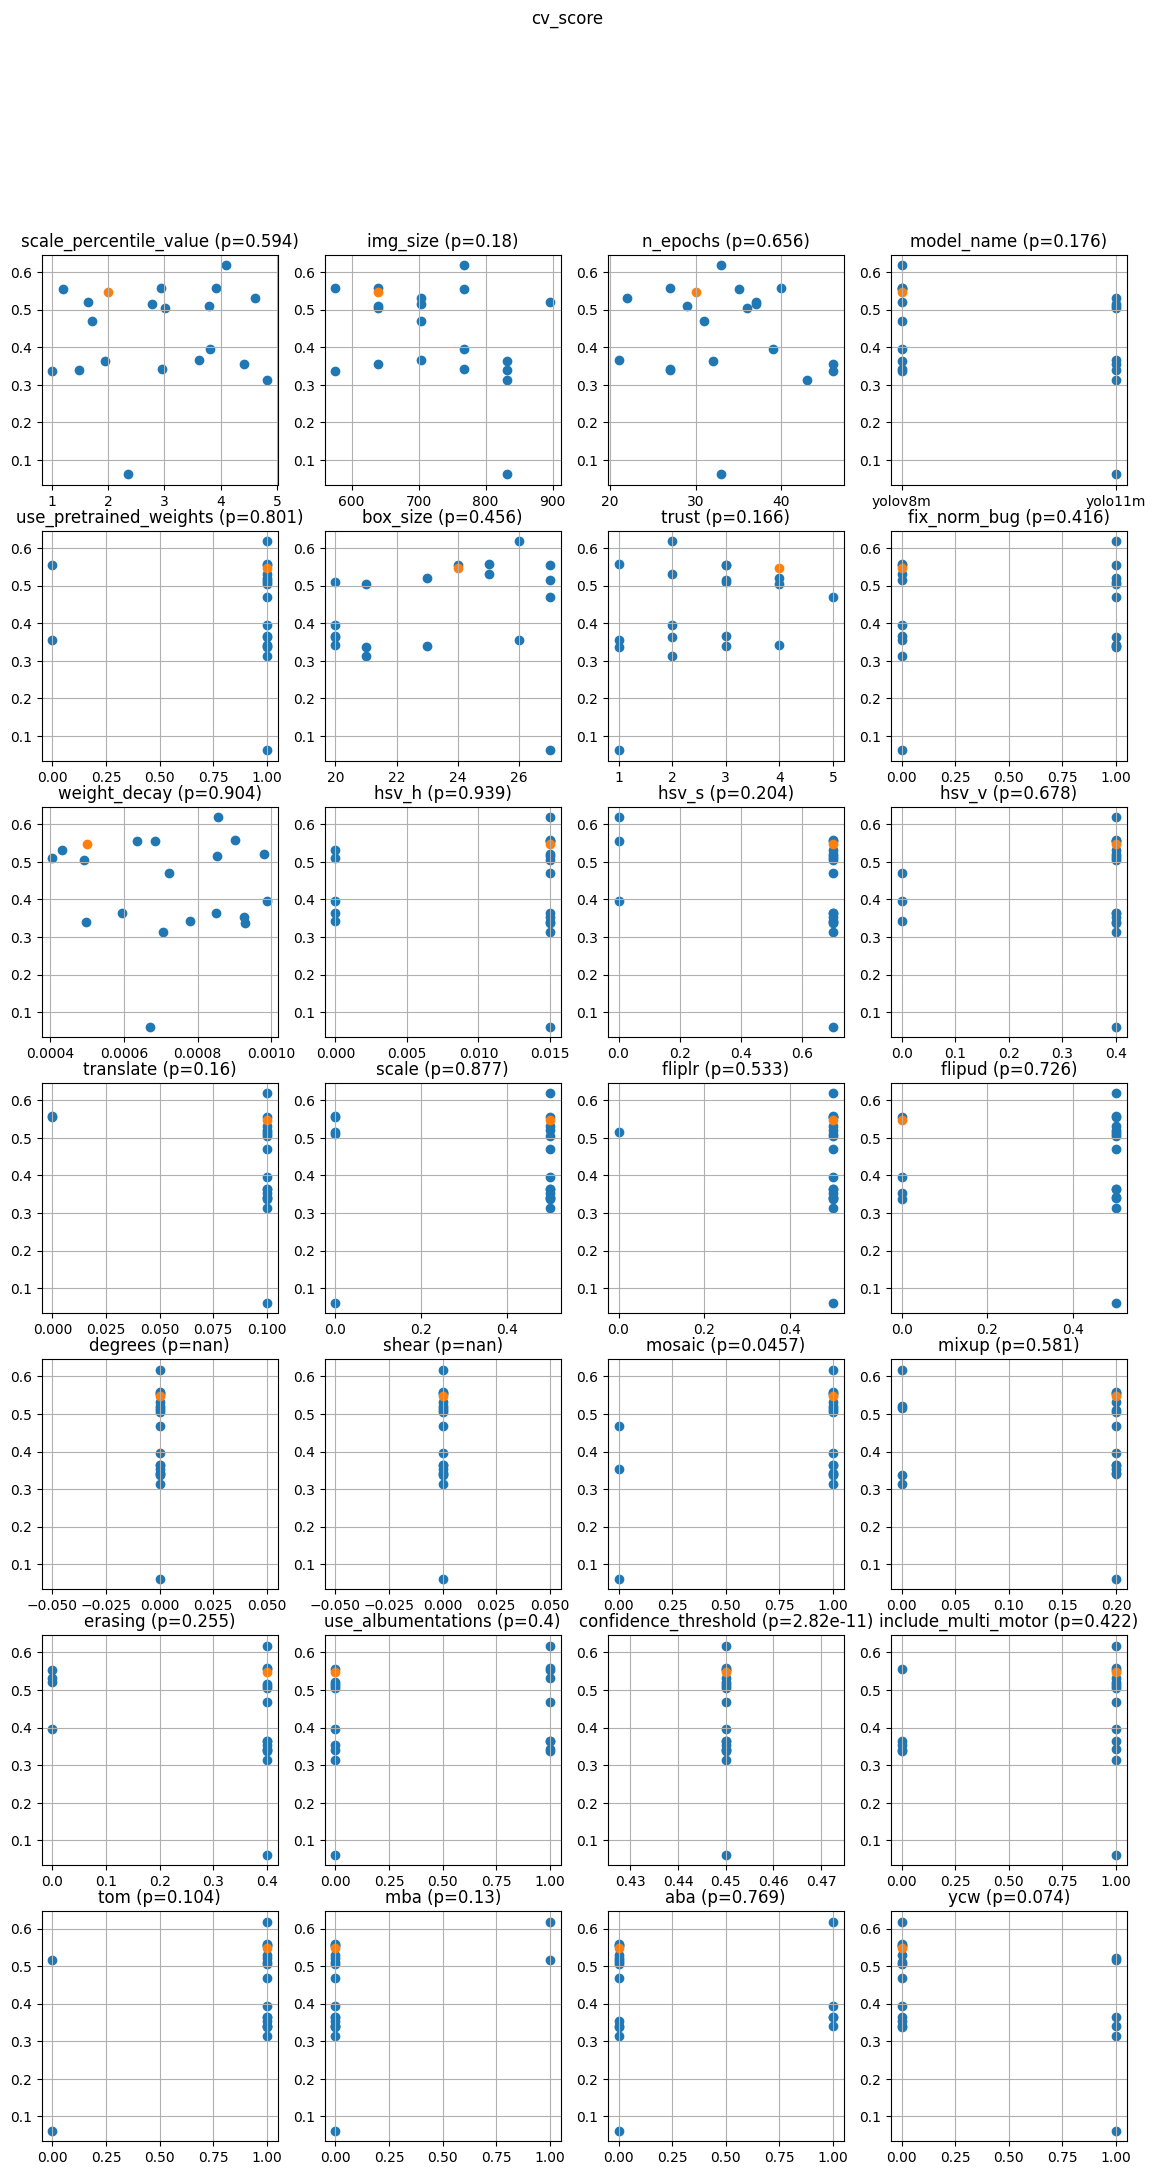

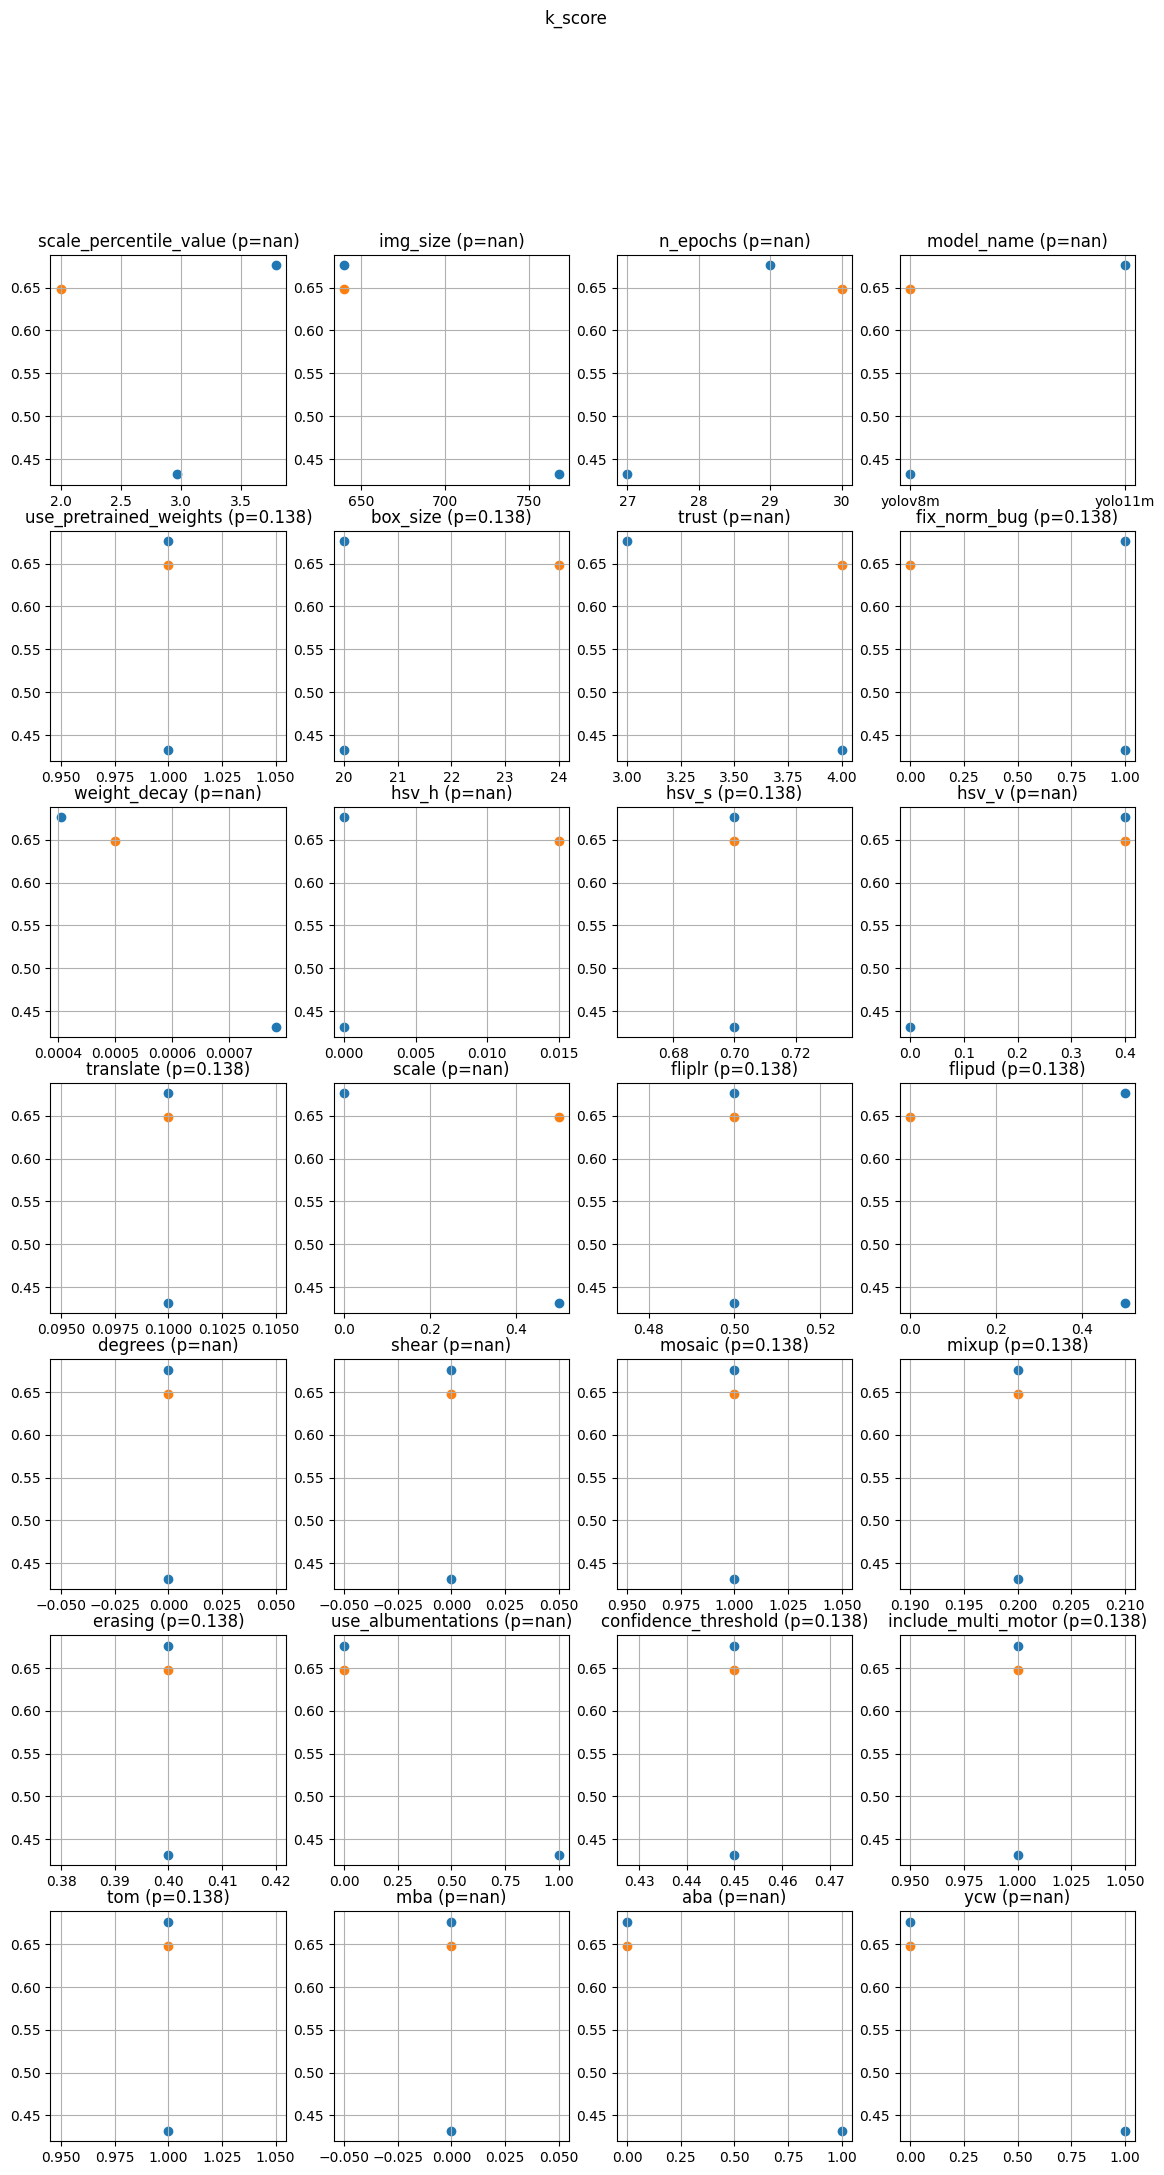

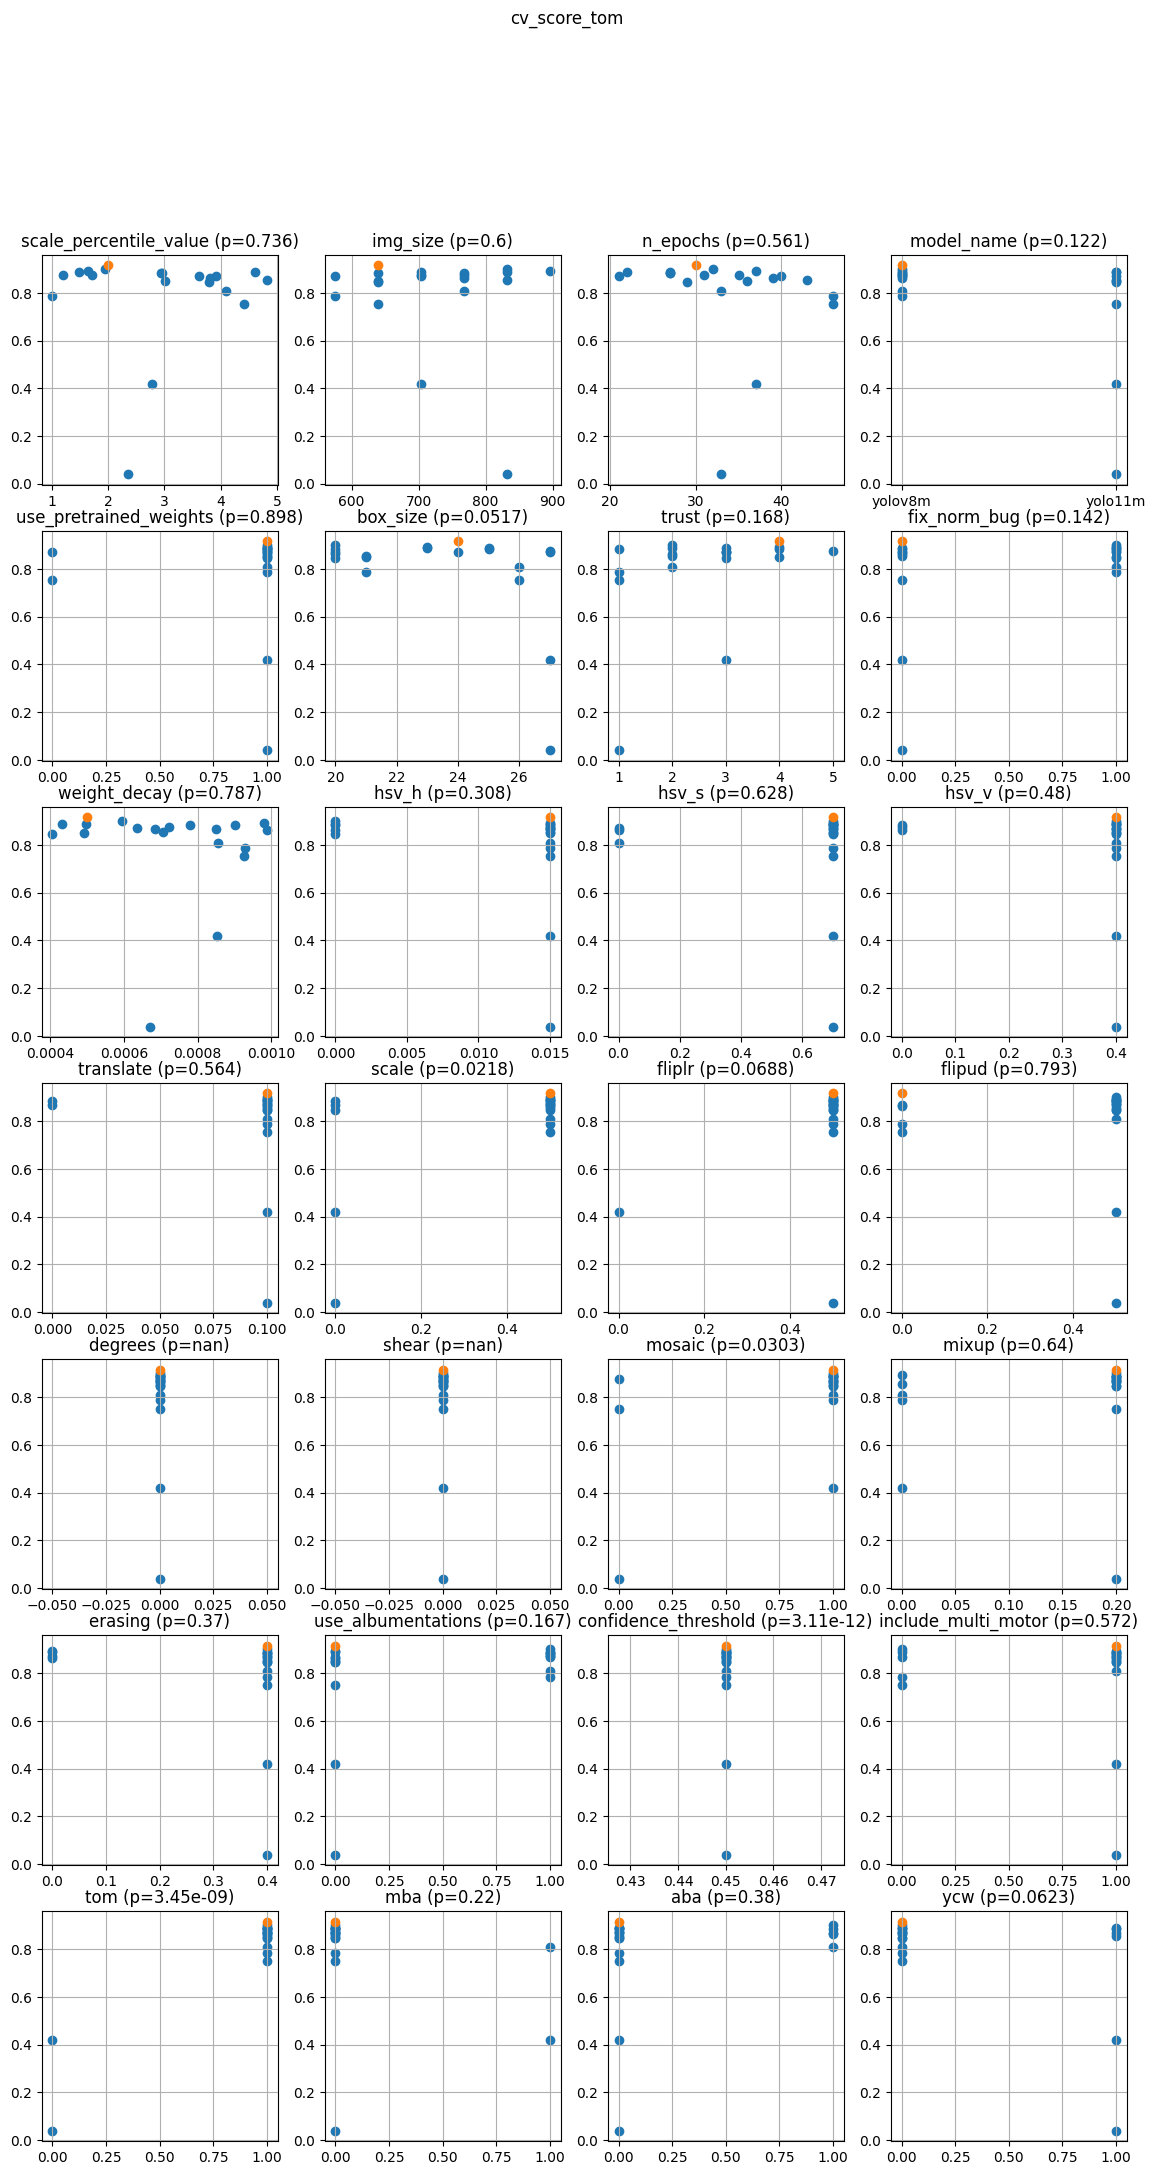

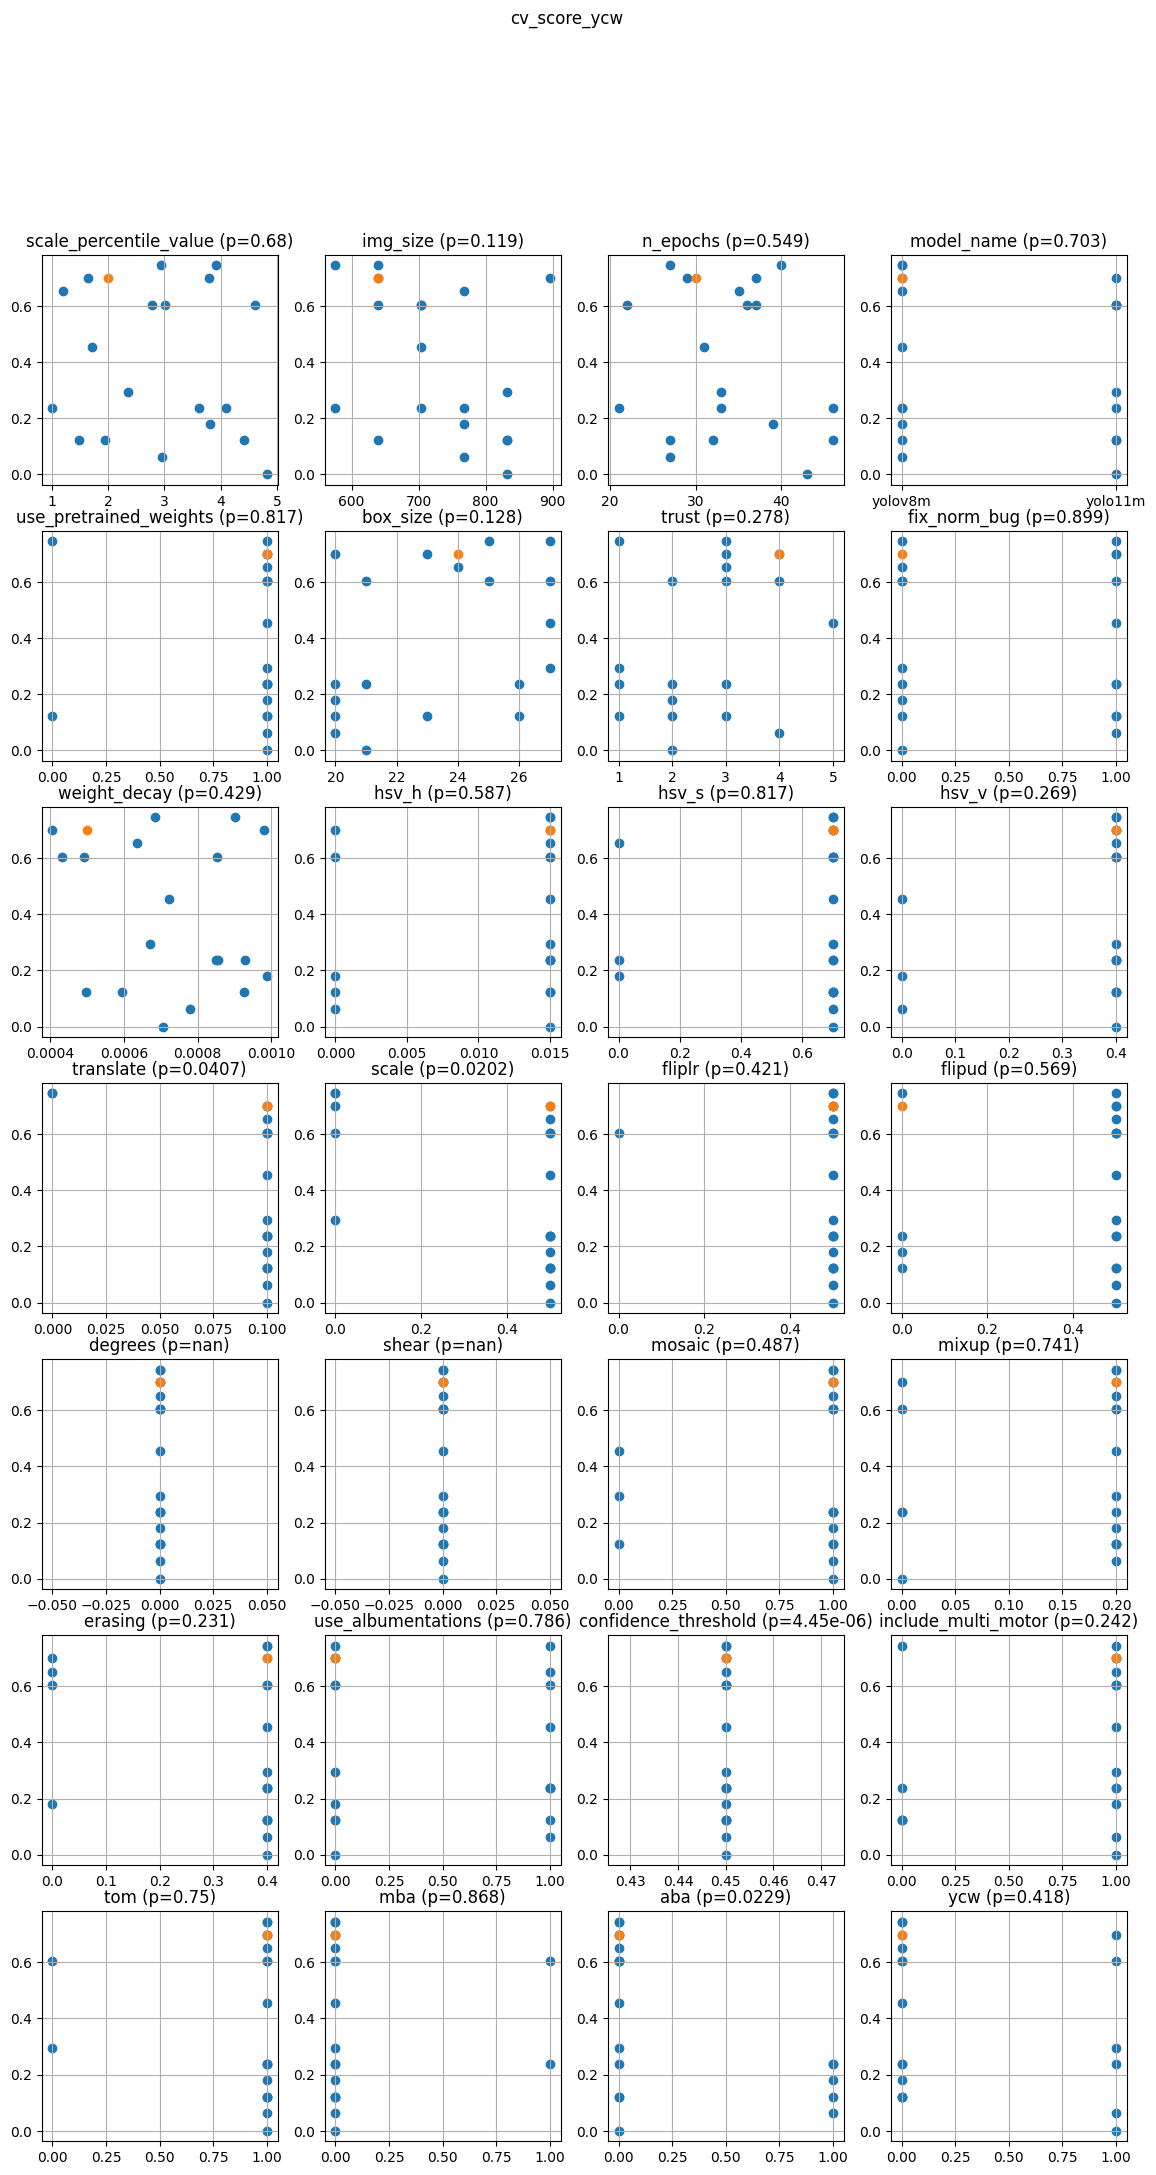

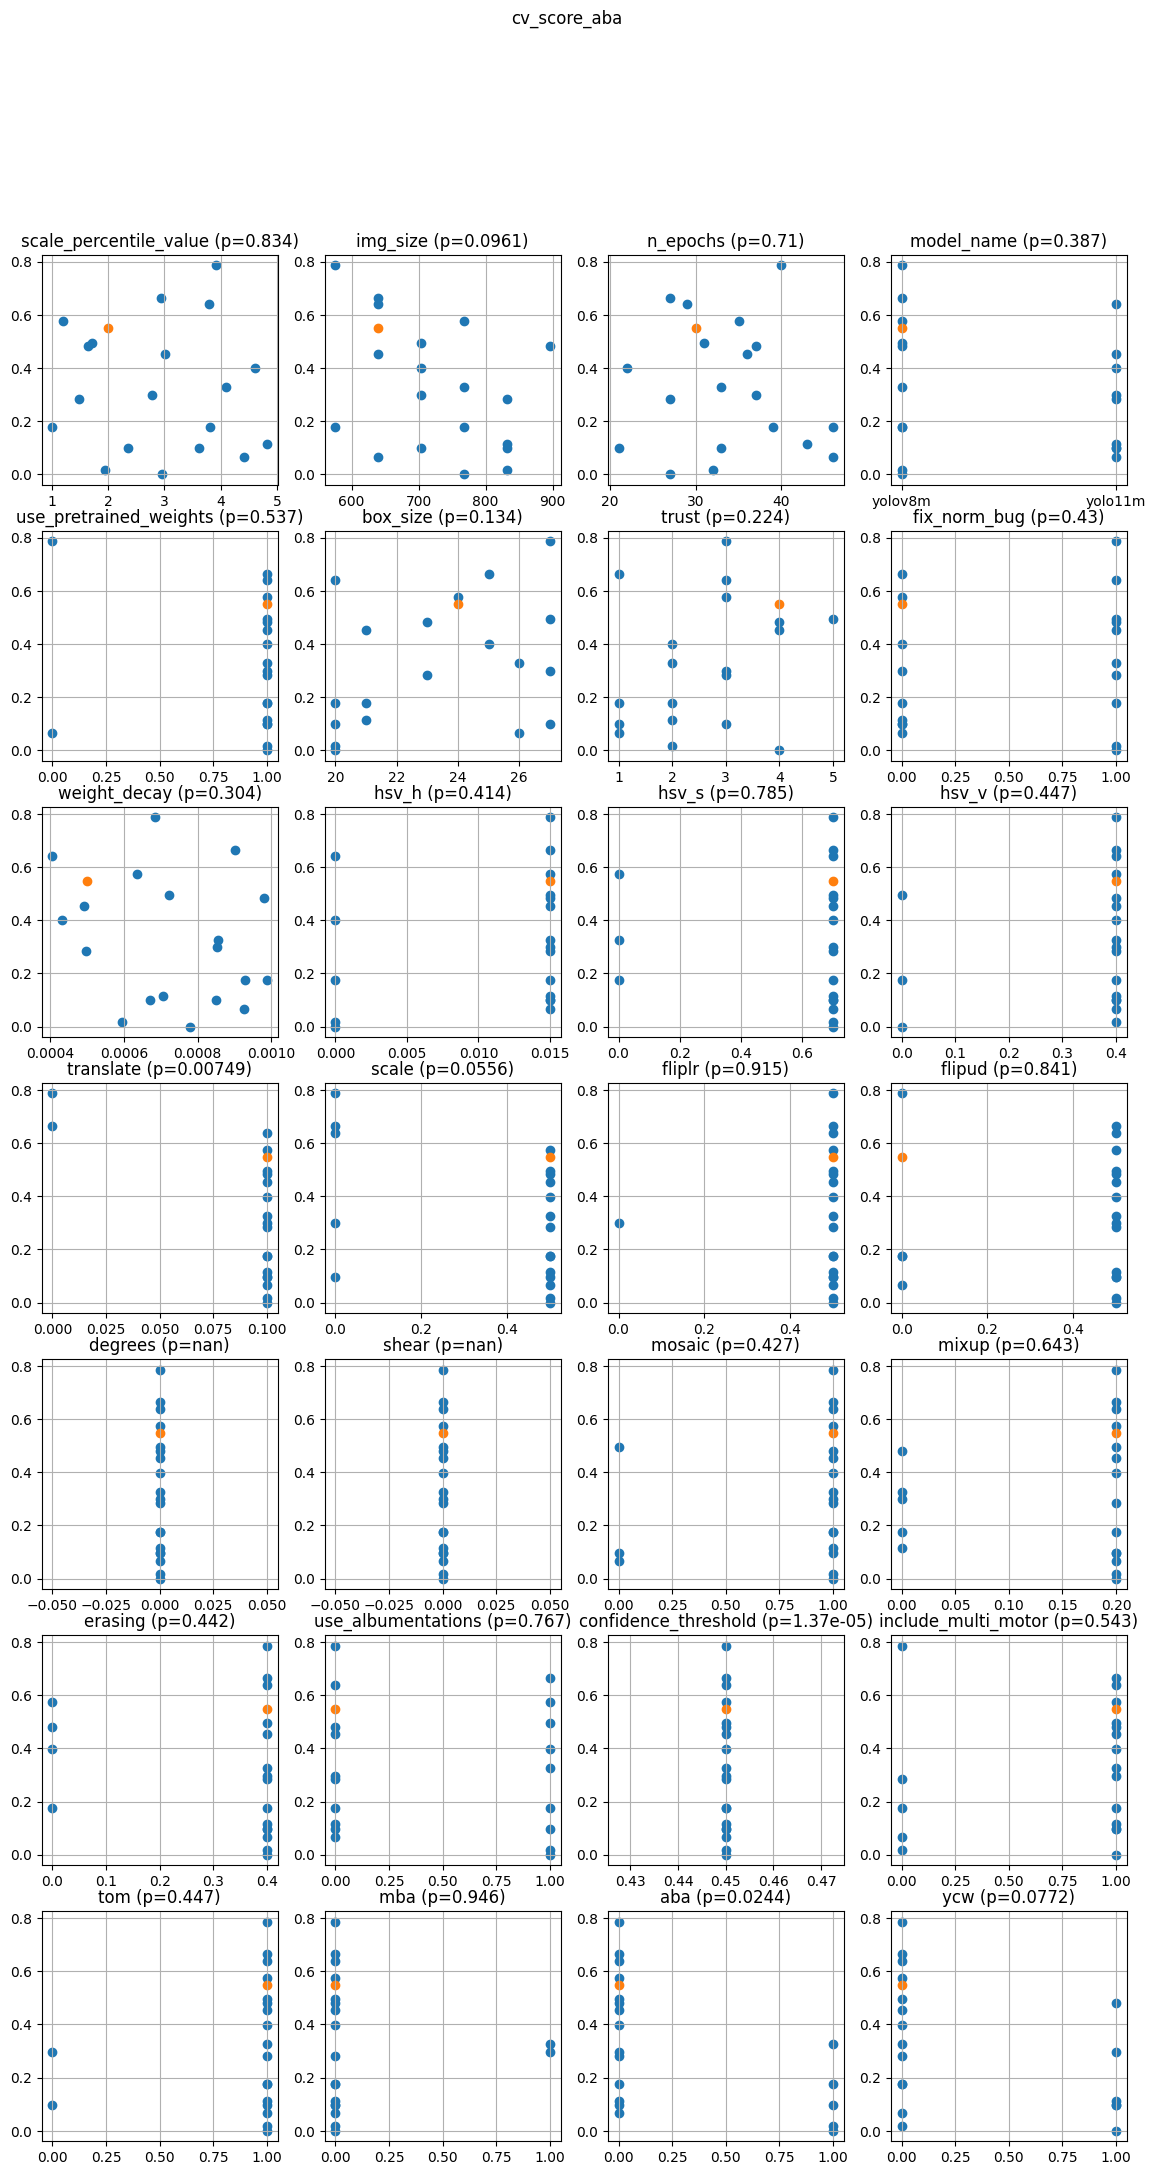

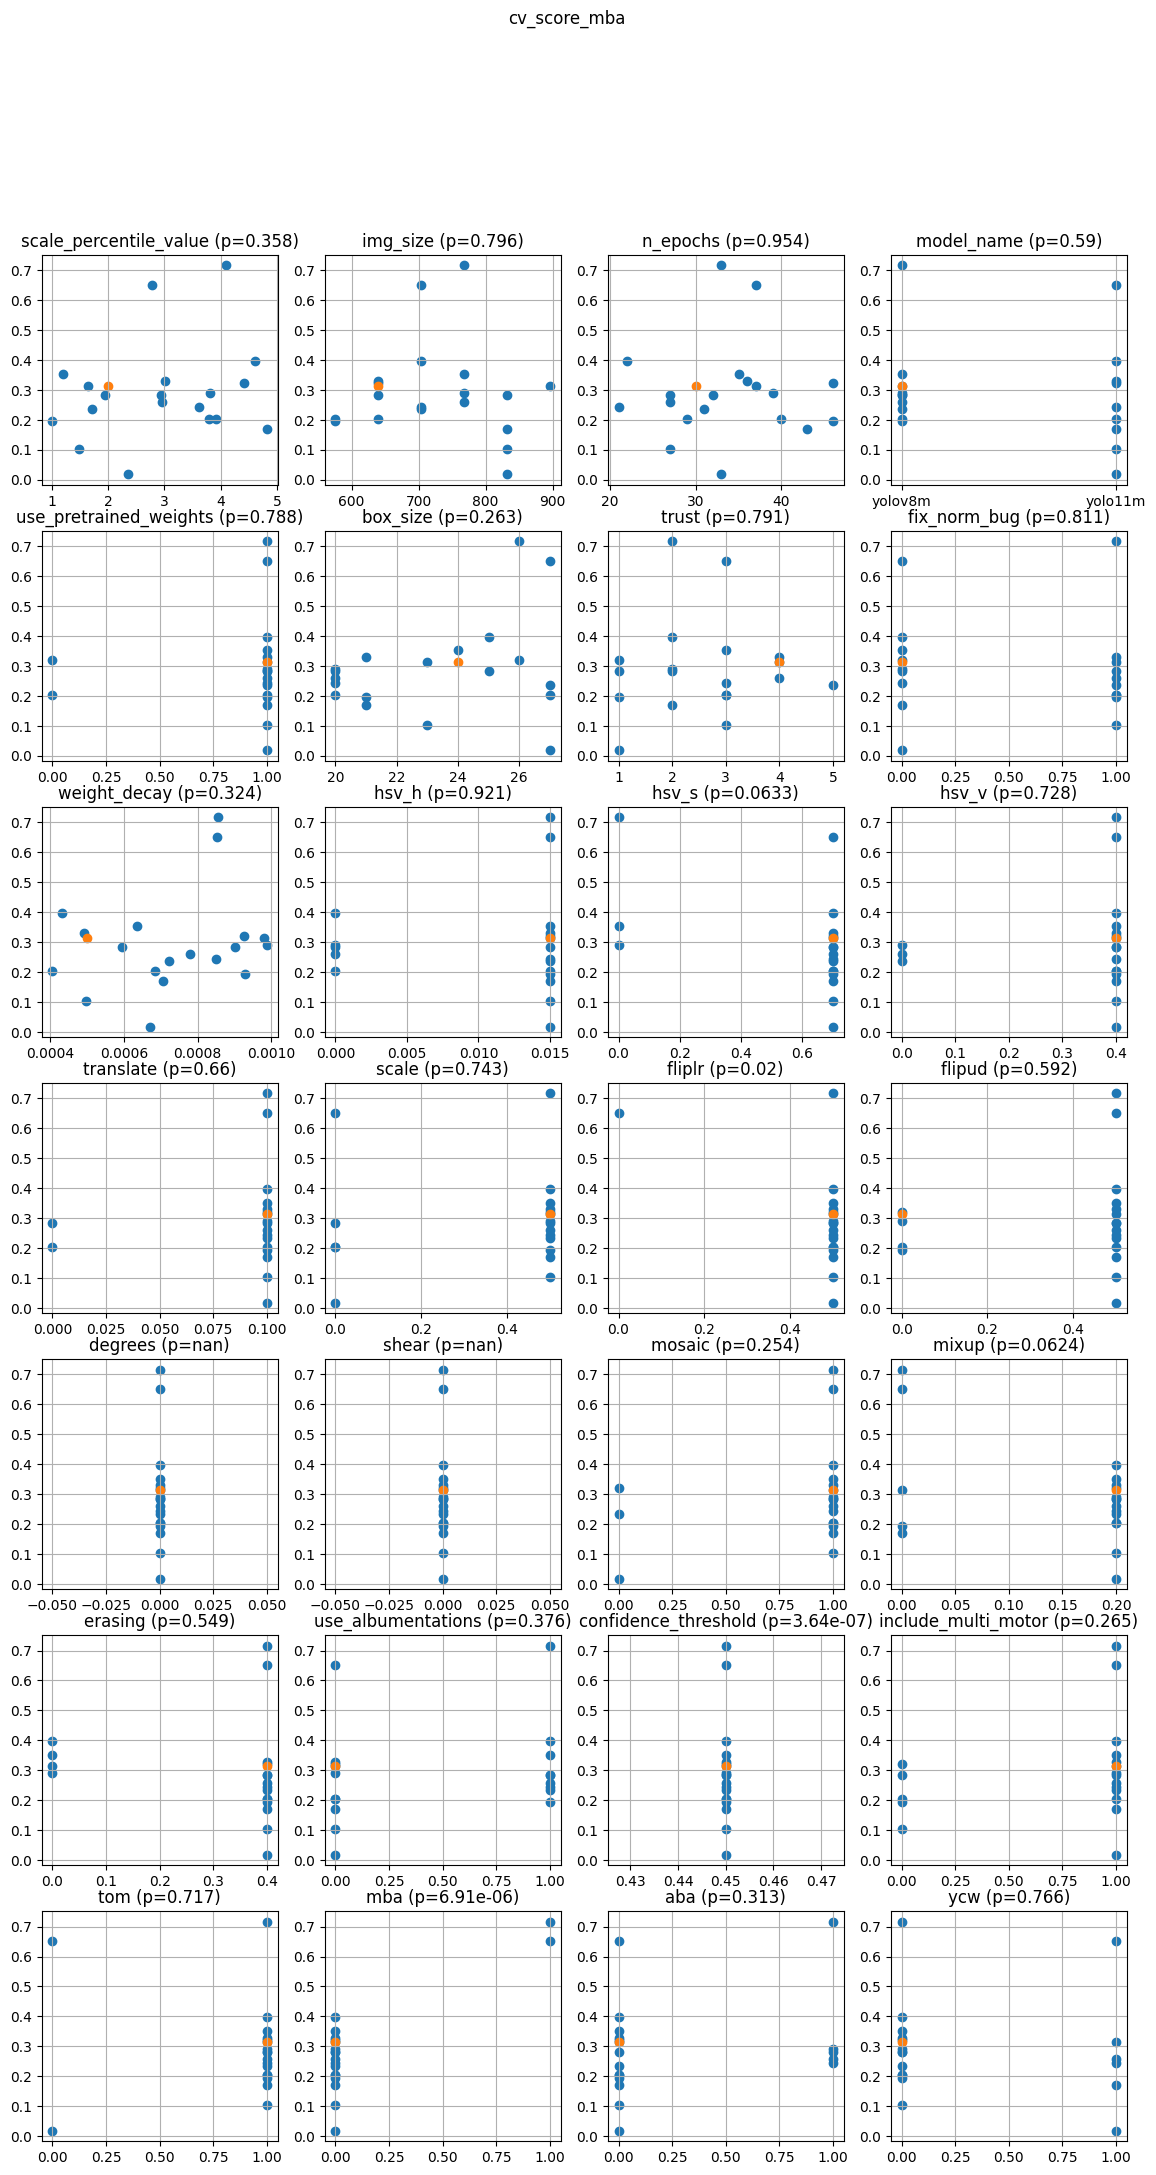

In [7]:
to_plot = p.columns.to_list()[2:-8]
main = np.logical_not(p['use_missing_value'])
ncols = 4
nrows = len(to_plot)//ncols
for y_val in p.columns[-6:][[0,5,1,2,3,4]].to_list():
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14,14/ncols*nrows))
    plt.suptitle(y_val)
    for idx,d in enumerate(to_plot):
        row = idx // ncols
        col = idx % ncols
        ax = axes[row, col]
        plt.sca(ax)        
        plt.xlabel('')
        plt.ylabel('')
        plt.grid(True)
        plt.scatter(p[d][main], p[y_val][main])
        plt.scatter(p[d][np.logical_not(main)], p[y_val][np.logical_not(main)])
       
        # fit

        pp = copy.deepcopy(p)
        if not pd.api.types.is_numeric_dtype(pp[d]) or pd.api.types.is_bool_dtype(pp[d]):
            pp[d] = pp[d].astype('category').cat.codes
        X = pp[[d]][main]
        X['intercept'] = 1.
        y = p[y_val][main]
        to_keep = np.logical_not(np.isnan(y))
        X = X[to_keep]; y=y[to_keep];
        model = sm.OLS(y,X)
        results=model.fit()
        p_val = results.pvalues[d]
        plt.title(f'{d} (p={p_val:.3})')
        
        # if d == 'mask_sizes0':
        #     x_vals = [m.mask_sizes[model.particles_to_do[0]][0] for m in model_list]
        # elif d == 'mask_sizes1':
        #     x_vals = [m.mask_sizes[model.particles_to_do[0]][1] for m in model_list]
        # elif d == 'mask_sizes2':
        #     x_vals = [m.mask_sizes[model.particles_to_do[0]][2] for m in model_list]
        # else:
        #     x_vals = [getattr(m, d)[model.particles_to_do[0]] for m in model_list]
        # if len(np.unique(x_vals))<8:
        #     #pass
        #     violin_plot(x_vals,score_vals)
        # else:
        #     plt.scatter(x_vals, score_vals)

In [8]:
X

,ycw,intercept
1,1,1.0
2,0,1.0
3,0,1.0
4,0,1.0
5,0,1.0
6,0,1.0
7,1,1.0
8,1,1.0
9,0,1.0
10,1,1.0


In [9]:
y

1     0.258765
2     0.202703
3     0.321252
4     0.351882
5     0.282392
6     0.397083
7     0.313531
8     0.650842
9     0.194585
10    0.017544
11    0.234899
12    0.290216
13    0.282392
14    0.328947
15    0.202703
16    0.170068
17    0.716440
18    0.242881
19    0.103448
Name: cv_score_mba, dtype: float64

In [10]:
results.summary()

C:\Users\jeroe\anaconda3\envs\jupyterlab-debugger2\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           cv_score_mba   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.053
Method:                 Least Squares   F-statistic:                   0.09114
Date:                Wed, 09 Apr 2025   Prob (F-statistic):              0.766
Time:                        10:49:54   Log-Likelihood:                 7.9498
No. Observations:                  19   AIC:                            -11.90
Df Residuals:                      17   BIC:                            -10.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ycw           -0.0251      0.083     -0.302      0.766      -0.200       0.150
intercept      0.3007      0.047      6.440      0.000       0.202       0.399
==============================================================================
Omnibus:                        9.872   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                7.024
Skew:                           1.256   Prob(JB):                       0.0298
Kurtosis:                       4.600   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""